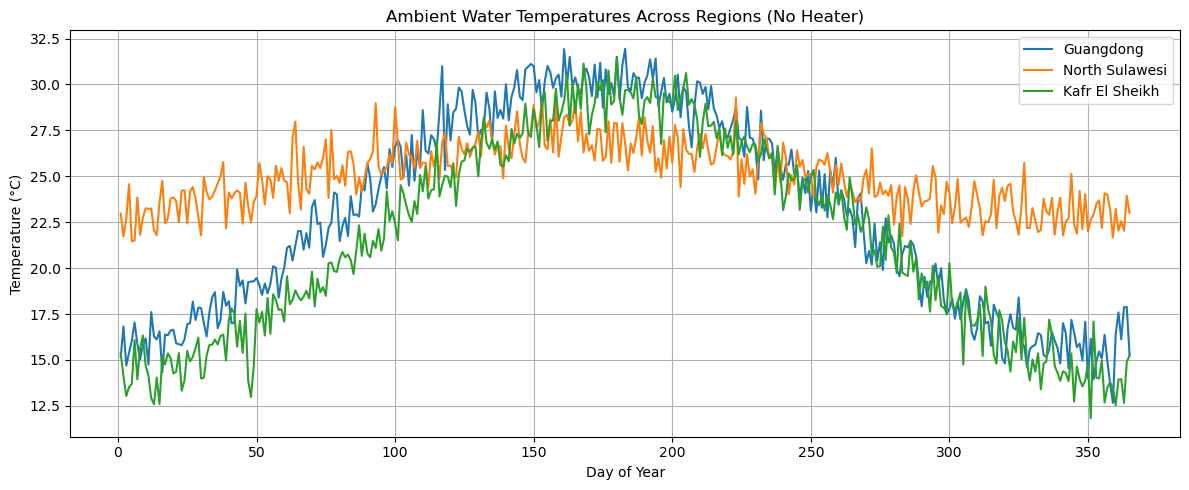

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

from model.temperature_model import TemperatureModel
from utils.config import Config

regions = ["guangdong", "north_sulawesi", "kafr_el_sheikh"]
days = 365

fig, ax = plt.subplots(figsize=(12, 5))

for loc in regions:
    model = TemperatureModel(loc)
    ambient = []

    for day in range(1, days + 1):
        model.set_day_of_year(day)
        ambient.append(model.get_ambient_temperature())

    ax.plot(range(1, days + 1), ambient, label=loc.replace("_", " ").title())

ax.set_title("Ambient Water Temperatures Across Regions (No Heater)")
ax.set_xlabel("Day of Year")
ax.set_ylabel("Temperature (°C)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

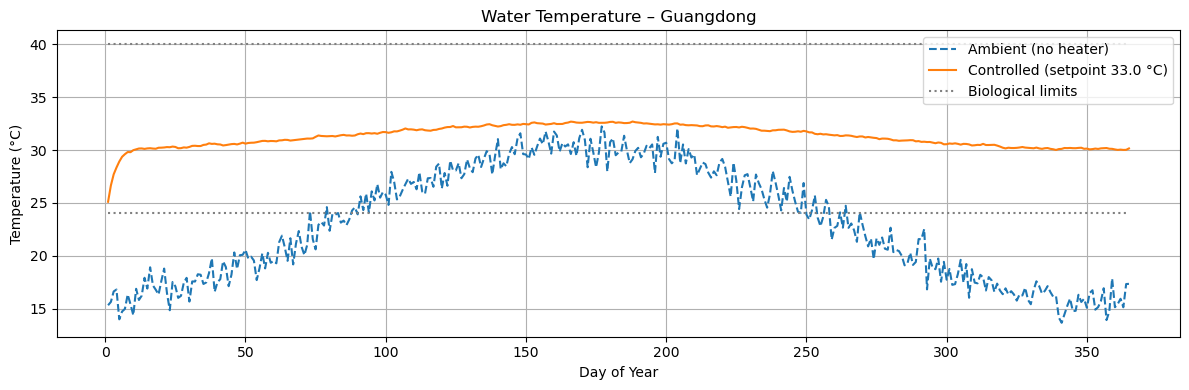

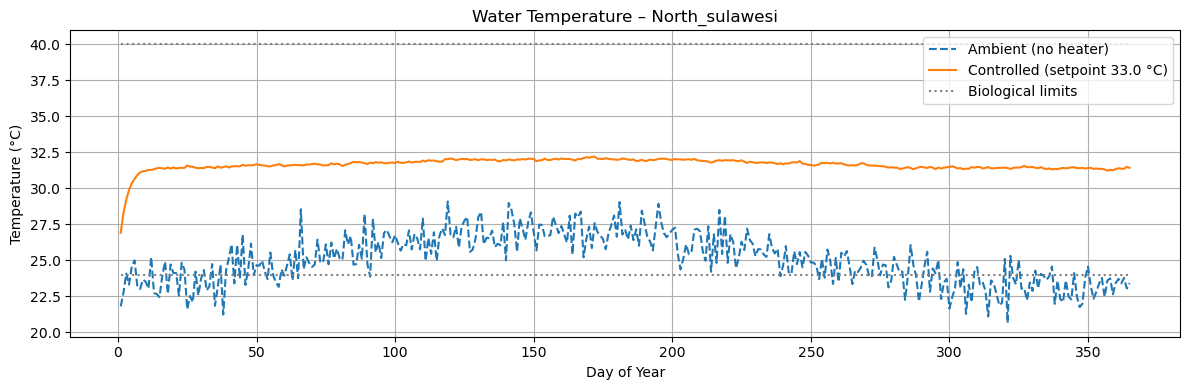

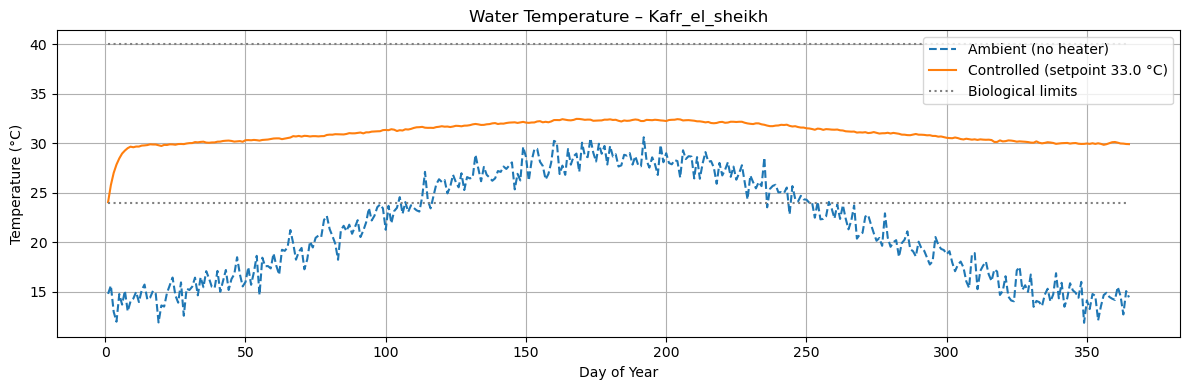

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

from model.temperature_model import TemperatureModel
from utils.config import Config

regions = ["guangdong", "north_sulawesi", "kafr_el_sheikh"]
days = 365
setpoint = 33.0

figures = []

for loc in regions:
    model = TemperatureModel(loc)
    ambient, controlled = [], []
    curr_T = model.current_T

    for day in range(1, days + 1):
        model.set_day_of_year(day)
        ambient.append(model.get_ambient_temperature())
        curr_T = model.set_temperature(setpoint)
        controlled.append(curr_T)

    # create separate figure for each regions
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(range(1, days + 1), ambient,   linestyle="--", color='tab:blue', label="Ambient (no heater)")
    ax.plot(range(1, days + 1), controlled, color='tab:orange', label=f"Controlled (setpoint {setpoint} °C)")
    ax.hlines([24, 40], 1, days, colors="grey", linestyles="dotted", label="Biological limits")

    ax.set_title(f"Water Temperature – {loc.capitalize()}")
    ax.set_xlabel("Day of Year")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()

    figures.append(fig)

plt.show()

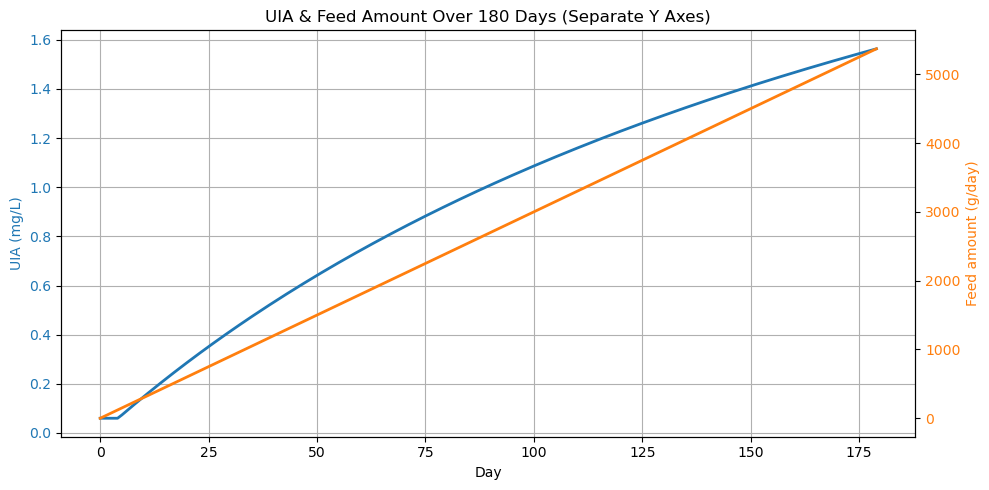

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model.uia_model import UIAModel

model = UIAModel()
uia_values = []
feed_values = []

for day in range(180):
    feed_g = 30 * day 
    feed_values.append(feed_g)
    uia = model.get_uia(feed_g=feed_g, temperature=33)
    uia_values.append(uia)

days = np.arange(180)

# Plot with separate y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Day")
ax1.set_ylabel("UIA (mg/L)", color="tab:blue")
ax1.plot(days, uia_values, label="UIA (mg/L)", color="tab:blue", linewidth=2)
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel("Feed amount (g/day)", color="tab:orange")
ax2.plot(days, feed_values, label="Feed amount (g/day)", color="tab:orange", linewidth=2)
ax2.tick_params(axis="y", labelcolor="tab:orange")

plt.title("UIA & Feed Amount Over 180 Days (Separate Y Axes)")
fig.tight_layout()
plt.show()

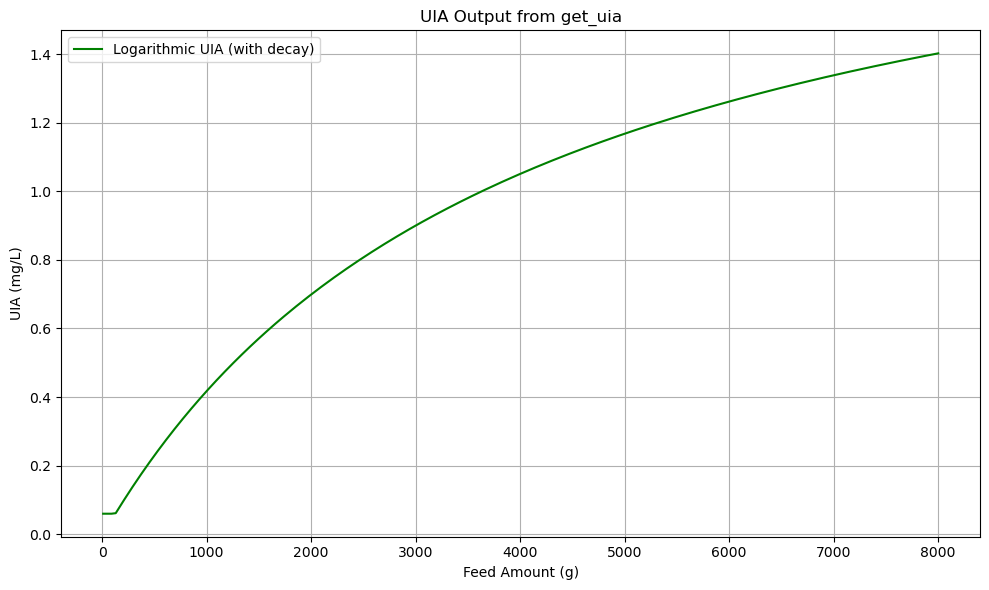

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from model.uia_model import UIAModel

model = UIAModel()
temperature = 33

feed_values = np.linspace(10, 8000, 200)
uia_outputs = [model.get_uia(feed_g, temperature) for feed_g in feed_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(feed_values, uia_outputs, label="Logarithmic UIA (with decay)", color='green')
plt.xlabel("Feed Amount (g)")
plt.ylabel("UIA (mg/L)")
plt.title("UIA Output from get_uia")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()